In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
import mlflow
import os

from sklearn.metrics import (
    classification_report, 
    confusion_matrix,
)

from dotenv import load_dotenv
load_dotenv()

2025-06-09 23:55:27.660839: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-09 23:55:27.669870: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749488127.680274   37282 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749488127.683491   37282 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-09 23:55:27.694705: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

True

In [2]:
tf.__version__

'2.18.0'

In [3]:
import transformers

transformers.__version__

'4.52.4'

# Load Resources

In [4]:
test_ds_path = "../../datasets/CLEAN_NWPU-RESISC45-SAMPLE500-SPLITTED8515/test"

## Loading Models and Histories

In [5]:
models = {
    "base_resnet50v2": "resnet50v2_15/base_resnet50v2_15_epoch0015.keras",
    "aug_resnet50v2": "resnet50v2_15/aug_resnet50v2_15_epoch0015.keras",
    
    "base_convnext-tiny": "convnexttiny_15/base_convnext-tiny_15_epoch0015.keras",
    "aug_convnext-tiny": "convnexttiny_15/aug_convnext-tiny_15_epoch0015.keras",
}

histories = {
    "history_base_resnet50v2": "resnet50v2_15/history_base_resnet50v2_15.joblib",
    "history_aug_resnet50v2": "resnet50v2_15/history_aug_resnet50v2_15.joblib",
    
    "history_base_convnext-tiny": "convnexttiny_15/history_base_convnext-tiny_15.joblib",
    "history_aug_convnext-tiny": "convnexttiny_15/history_aug_convnext-tiny_15.joblib",
}

# Load Models
for x in models.keys():
    models[x] = tf.keras.models.load_model(os.path.join("../../outputs/models/", models[x]))
    
# Load Histories
for x in histories.keys():
    histories[x] = joblib.load(os.path.join("../../outputs/histories/", histories[x]))
    
models

I0000 00:00:1749488130.971793   37282 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


{'base_resnet50v2': <Functional name=base_resnet50v2_15, built=True>,
 'aug_resnet50v2': <Functional name=aug_resnet50v2_15, built=True>,
 'base_convnext-tiny': <Functional name=base_convnext-tiny_15, built=True>,
 'aug_convnext-tiny': <Functional name=aug_convnext-tiny_15, built=True>}

In [6]:
img_size = (224, 224)
batch_size = 10

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_ds_path,
    shuffle = False,
    image_size = img_size,
    batch_size=batch_size
)

classes = test_ds.class_names
print(f"""
Class names: {classes}
Len data within each batch: {len(test_ds)}
""")

Found 3375 files belonging to 45 classes.

Class names: ['airplane', 'airport', 'baseball_diamond', 'basketball_court', 'beach', 'bridge', 'chaparral', 'church', 'circular_farmland', 'cloud', 'commercial_area', 'dense_residential', 'desert', 'forest', 'freeway', 'golf_course', 'ground_track_field', 'harbor', 'industrial_area', 'intersection', 'island', 'lake', 'meadow', 'medium_residential', 'mobile_home_park', 'mountain', 'overpass', 'palace', 'parking_lot', 'railway', 'railway_station', 'rectangular_farmland', 'river', 'roundabout', 'runway', 'sea_ice', 'ship', 'snowberg', 'sparse_residential', 'stadium', 'storage_tank', 'tennis_court', 'terrace', 'thermal_power_station', 'wetland']
Len data within each batch: 338



In [7]:
rescaling_layer = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
])

test_ds = test_ds.map(lambda x, y: (rescaling_layer(x), y))

# Evaluation

## Loss and Acc

In [8]:
def model_eval(model_name, name):
    loss, acc = model_name.evaluate(test_ds, verbose=0)
    print(f"### eval result of {name} ####\nTest Loss: {loss}\nTest Acc: {acc}")
    return loss, acc

In [ ]:
loss_base_resnet50v2, acc_base_resnet50v2 = model_eval(models["base_resnet50v2"], name="base_resnet50v2")
loss_aug_resnet50v2, acc_aug_resnet50v2 = model_eval(models["aug_resnet50v2"], name="aug_resnet50v2")
loss_base_convnext_tiny, acc_base_convnext_tiny = model_eval(models["base_convnext-tiny"], name="base_convnext-tiny")
loss_aug_convnext_tiny, acc_aug_convnext_tiny = model_eval(models["aug_convnext-tiny"], name="aug_convnext-tiny")

I0000 00:00:1749488139.345754   37455 service.cc:148] XLA service 0x7f541c0038c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749488139.345865   37455 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-06-09 23:55:39.466376: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749488139.756181   37455 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-06-09 23:55:40.220218: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1497_0', 8 bytes spill stores, 8 bytes spill loads

2025-06-09 23:55:40.747362: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1518

### eval result of base_resnet50v2 ####
Test Loss: 0.4513745903968811
Test Acc: 0.8962963223457336
### eval result of aug_resnet50v2 ####
Test Loss: 0.3528420925140381
Test Acc: 0.9105185270309448


2025-06-09 23:56:11.910407: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 116 bytes spill stores, 116 bytes spill loads

2025-06-09 23:56:12.011960: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 76 bytes spill stores, 76 bytes spill loads

2025-06-09 23:56:12.024706: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_12', 84 bytes spill stores, 84 bytes spill loads

2025-06-09 23:56:12.121997: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 56 bytes spill stores, 56 bytes spill loads

2025-06-09 23:56:12.414295: I external/local_xla/xla/stream_executor/cuda/c

### eval result of base_convnext-tiny ####
Test Loss: 0.3488973379135132
Test Acc: 0.9185185432434082
### eval result of aug_convnext-tiny ####
Test Loss: 0.2892458140850067
Test Acc: 0.9173333048820496


## Predicitons

In [10]:
y_true = np.concatenate([label.numpy() for _, label in test_ds])
len(y_true)

2025-06-09 23:56:45.500987: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


3375

In [11]:
### RESNET50-V2
base_resnet50v2_preds = tf.nn.softmax(models["base_resnet50v2"].predict(test_ds), axis=-1)
base_resnet50v2_preds_labels = np.argmax(base_resnet50v2_preds, axis=-1)

aug_resnet50v2_preds = tf.nn.softmax(models["aug_resnet50v2"].predict(test_ds), axis=-1)
aug_resnet50v2_preds_labels = np.argmax(aug_resnet50v2_preds, axis=-1)

### CONVNEXT-TINY
base_convnextiny_preds = tf.nn.softmax(models["base_convnext-tiny"].predict(test_ds), axis=-1)
base_convnextiny_preds_labels = np.argmax(base_convnextiny_preds, axis=-1)

aug_convnextiny_preds = tf.nn.softmax(models["aug_convnext-tiny"].predict(test_ds), axis=-1)
aug_convnextiny_preds_labels = np.argmax(aug_convnextiny_preds, axis=-1)

338/338 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step
338/338 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step
338/338 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step
338/338 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step


## Classification Report

In [12]:
resnet50v2_aug_clfreport = classification_report(base_resnet50v2_preds_labels, y_true, target_names=classes, output_dict=True)
resnet50v2_base_clfreport = classification_report(aug_resnet50v2_preds_labels, y_true, target_names=classes, output_dict=True)


convnexttiny_base_clfreport = classification_report(base_convnextiny_preds_labels, y_true, target_names=classes, output_dict=True)
convnexttiny_aug_clfreport = classification_report(aug_convnextiny_preds_labels, y_true, target_names=classes, output_dict=True)

## Confussion Matrix Each Model

In [13]:
def plot_cm(y_pred, y_true, model_name):
    plt.figure(figsize=(15, 10))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.title(f'Confusion Matrix of {model_name} Performance')
    plt.show()

### ResNet-50 V2

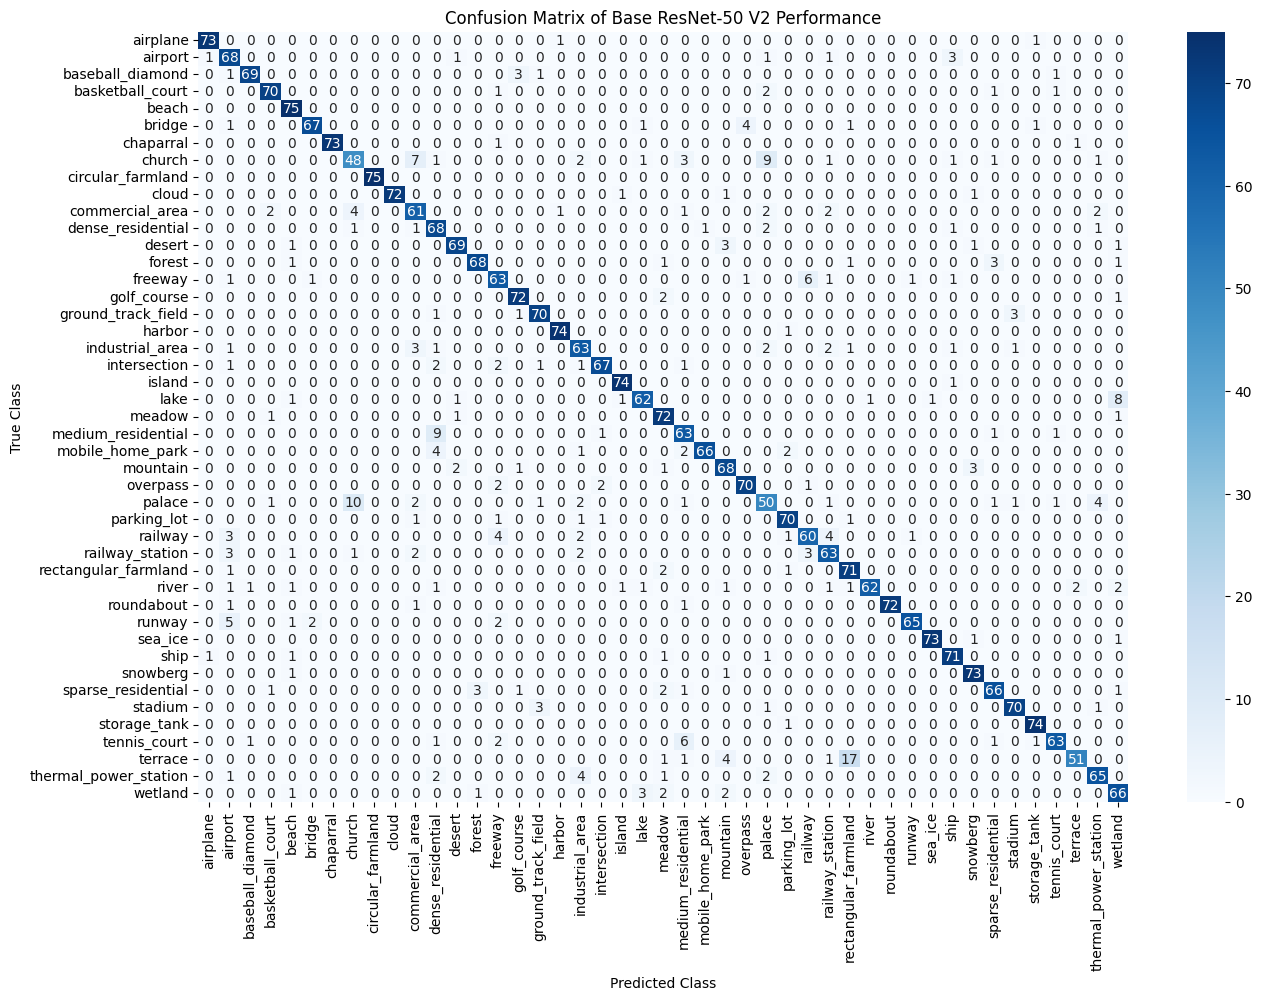

In [14]:
plot_cm(base_resnet50v2_preds_labels, y_true, "Base ResNet-50 V2")

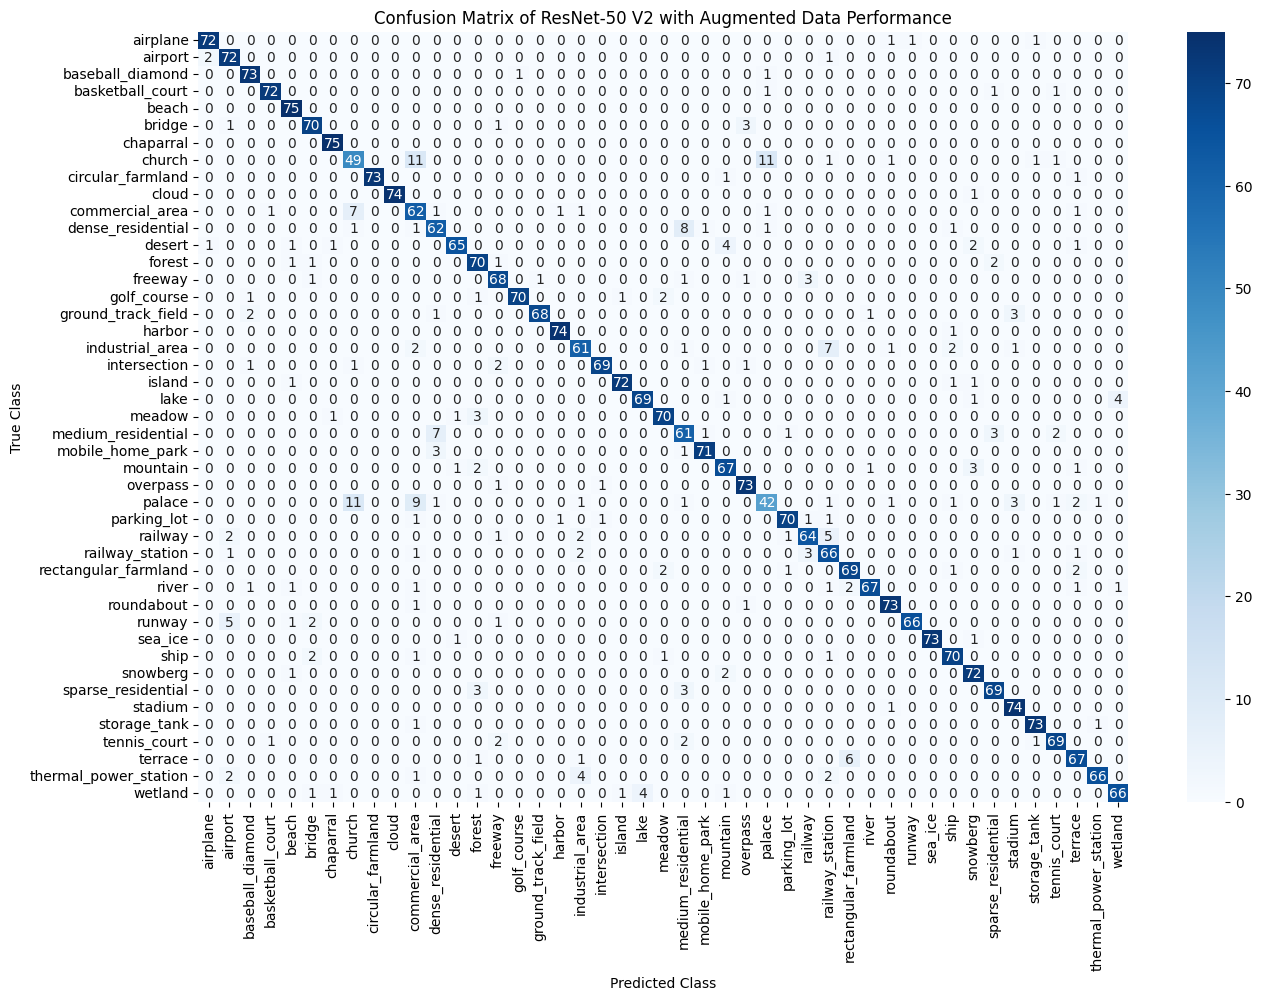

In [15]:
plot_cm(aug_resnet50v2_preds_labels, y_true, "ResNet-50 V2 with Augmented Data")

## ConvNeXt Tiny 

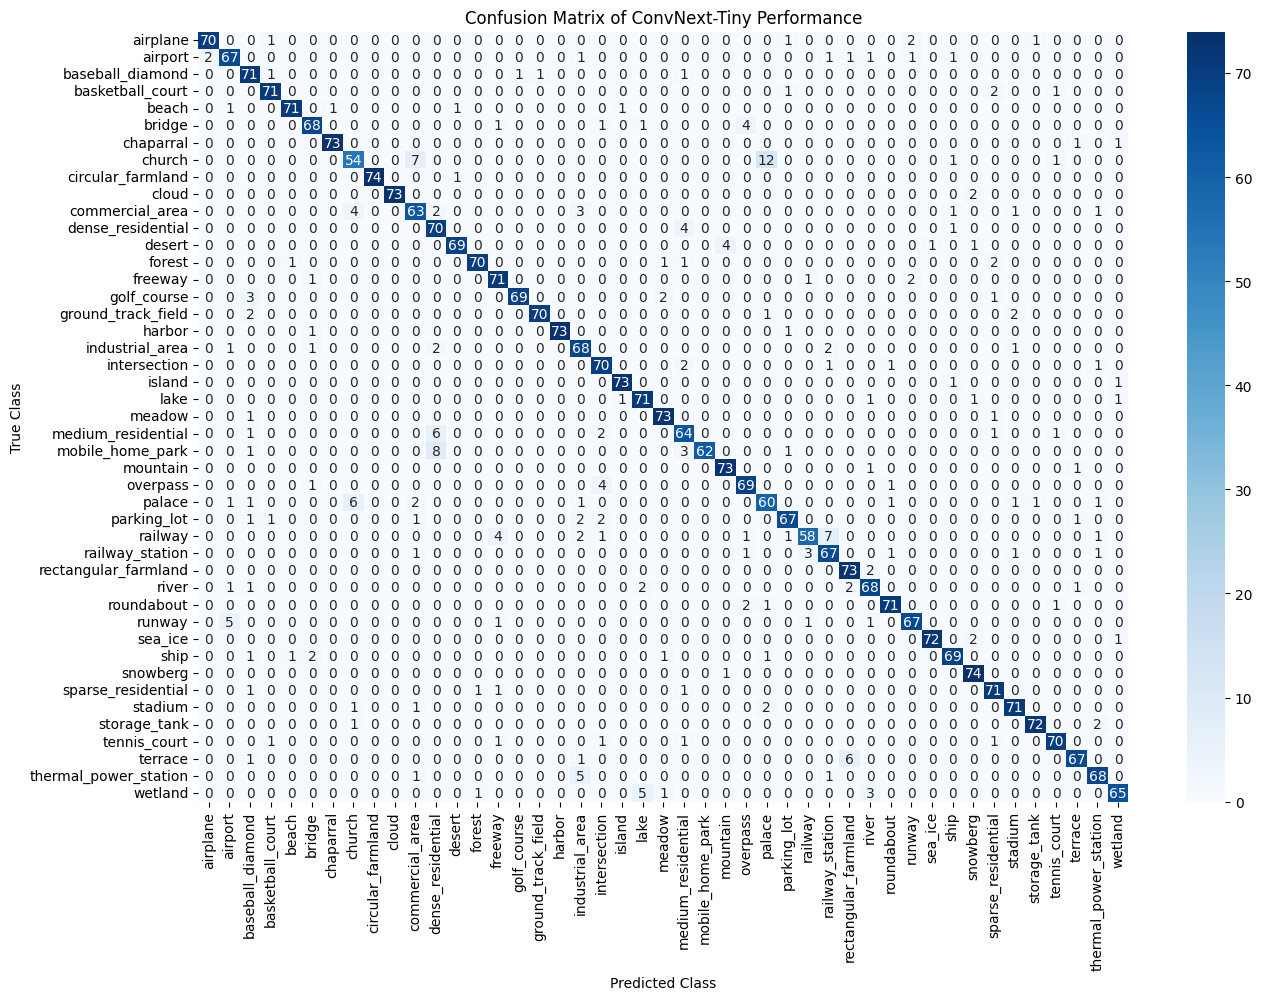

In [16]:
plot_cm(base_convnextiny_preds_labels, y_true, "ConvNext-Tiny")

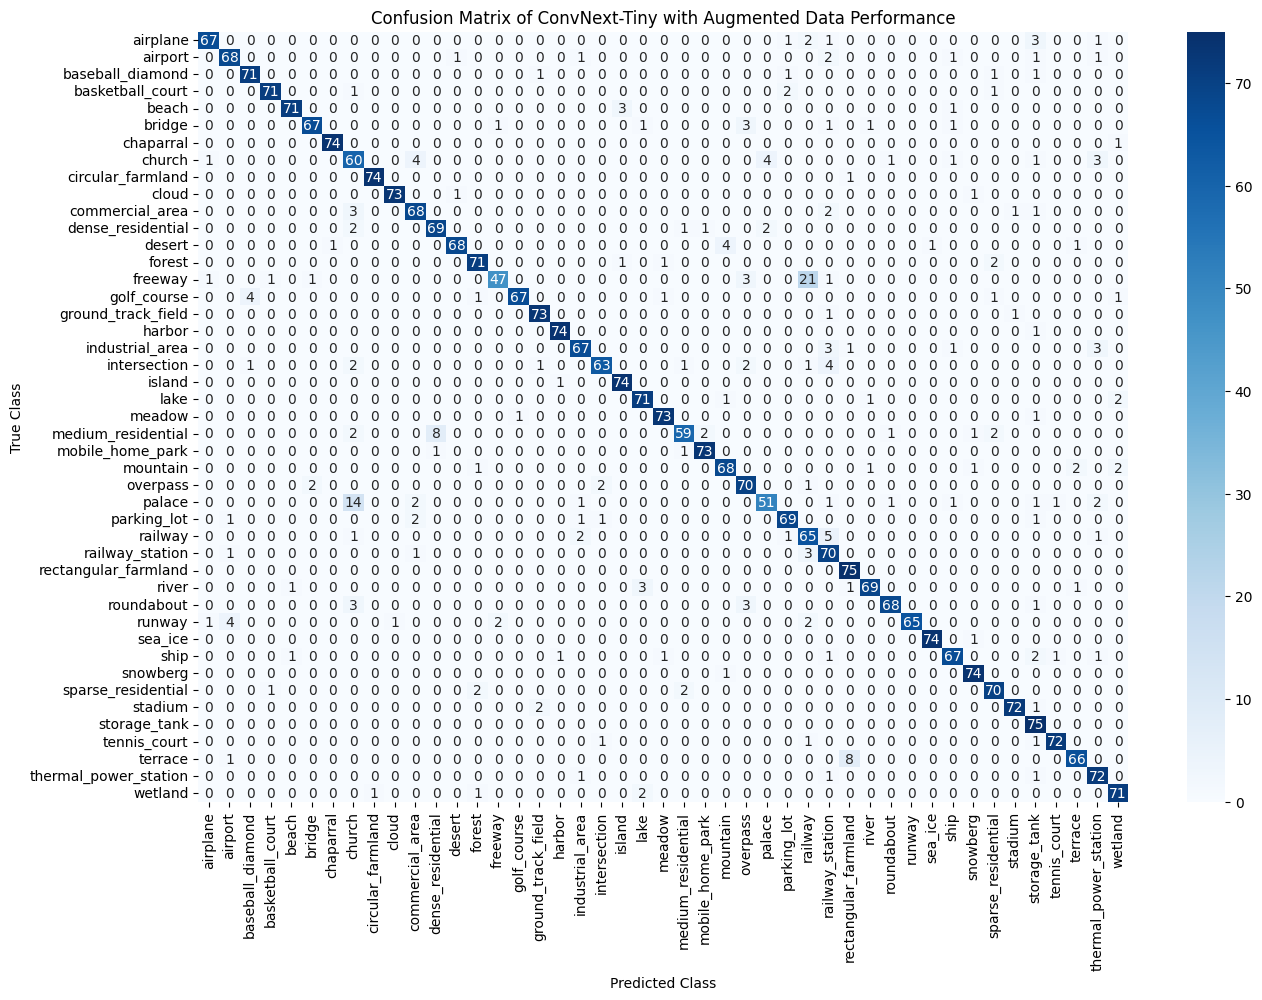

In [17]:
plot_cm(aug_convnextiny_preds_labels, y_true, "ConvNext-Tiny with Augmented Data")

# Deploy to MLFlow Tracking

In [18]:
models

{'base_resnet50v2': <Functional name=base_resnet50v2_15, built=True>,
 'aug_resnet50v2': <Functional name=aug_resnet50v2_15, built=True>,
 'base_convnext-tiny': <Functional name=base_convnext-tiny_15, built=True>,
 'aug_convnext-tiny': <Functional name=aug_convnext-tiny_15, built=True>}

In [19]:
model_acc = [acc_base_resnet50v2, acc_aug_resnet50v2, acc_base_convnext_tiny, acc_aug_convnext_tiny]
model_clfreport = [resnet50v2_aug_clfreport, resnet50v2_base_clfreport, convnexttiny_base_clfreport, convnexttiny_aug_clfreport]

model_acc_f = {
    name: model_acc[i] for i, name in enumerate(models.keys())
}

model_clfreport_f = {
    name: model_clfreport[i] for i, name in enumerate(models.keys())
}

In [31]:
X_test = []
y_test = []

for x, y in test_ds.take(1):
    X_test.append(x.numpy())
    y_test.append(y.numpy())
        
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

len(X_test), len(y_test)

(10, 10)

In [60]:
histories_f = {
    list(models.keys())[i]: val for i, val in enumerate(histories.values())
}

In [ ]:
# mlflow.set_tracking_uri(os.getenv("MLFOW_TRACKING_SERVER_URL"))
# mlflow.set_experiment("Experiment Remote Env")

# for model_name in models:
#     with mlflow.start_run(run_name=f"log_{model_name}"):
        
#         # ========= TRAINING HISTORY
#         epochs=15
#         for i, acc in enumerate(histories_f[model_name]["accuracy"]):
#             mlflow.log_metric("train_accuracy", acc, step=i)
        
#         for i, val_acc in enumerate(histories_f[model_name]["val_accuracy"]):
#             mlflow.log_metric("train_val_accuracy", val_acc, step=i)
        
        
#         # ========= LOG ACCURACY
#         mlflow.log_metric("accuracy", model_acc_f[model_name])
        
        
#         # ========= MODEL SIGNATURE        
#         y_preds_prob = tf.nn.softmax(models[model_name].predict(X_test), axis=-1)
#         y_pred = np.argmax(y_preds_prob, axis=-1)
#         signature = mlflow.models.signature.infer_signature(X_test[:1], y_preds_prob[:1])
        
        
#         # ========= AVG N MACRO
#         for avg_type in ["macro avg", "weighted avg"]:
#             for metric_name, val in model_clfreport_f[model_name][avg_type].items():
#                 if metric_name != "support":
#                     mlflow.log_metric(
#                         f"{avg_type.replace(' ', '_')}_{metric_name}", 
#                         val
#                     )
        
                    
#         # ========= Metrics perClass
#         for class_name in classes:
#             metrics = model_clfreport_f[model_name][class_name]
#             for metric_name, value in metrics.items():
#                 if metric_name != "support":
#                     mlflow.log_metric(
#                         f"class_{class_name}_{metric_name}", 
#                         value
#                     )
                
                    
#         # ========= MODEL ARTIFACT
#         mlflow.tensorflow.log_model(
#             models[model_name],
#             artifact_path="model",
#             signature=signature,
#             registered_model_name=f"{model_name}_rssc"
#         )

        
#         print(f"Logged MLflow Run for: {model_name}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


2025/06/10 01:21:27 WARNING mlflow.models.signature: Failed to infer schema for outputs. Setting schema to `Schema([ColSpec(type=AnyType())]` as default. To see the full traceback, set logging level to DEBUG.
Registered model 'base_resnet50v2_rssc' already exists. Creating a new version of this model...
2025/06/10 01:27:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: base_resnet50v2_rssc, version 2
Created version '2' of model 'base_resnet50v2_rssc'.


Logged MLflow Run for: base_resnet50v2
🏃 View run log_base_resnet50v2 at: https://rssc-model-tracker-h0h9eme5g7facdgz.southeastasia-01.azurewebsites.net/#/experiments/2/runs/6311d629600641aa98a159ebd9fd3f26
🧪 View experiment at: https://rssc-model-tracker-h0h9eme5g7facdgz.southeastasia-01.azurewebsites.net/#/experiments/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


2025/06/10 01:28:04 WARNING mlflow.models.signature: Failed to infer schema for outputs. Setting schema to `Schema([ColSpec(type=AnyType())]` as default. To see the full traceback, set logging level to DEBUG.
Successfully registered model 'aug_resnet50v2_rssc'.
2025/06/10 01:33:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: aug_resnet50v2_rssc, version 1
Created version '1' of model 'aug_resnet50v2_rssc'.


Logged MLflow Run for: aug_resnet50v2
🏃 View run log_aug_resnet50v2 at: https://rssc-model-tracker-h0h9eme5g7facdgz.southeastasia-01.azurewebsites.net/#/experiments/2/runs/91d0cee00e5b452090aa5f9d8ea10790
🧪 View experiment at: https://rssc-model-tracker-h0h9eme5g7facdgz.southeastasia-01.azurewebsites.net/#/experiments/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step


2025/06/10 01:34:12 WARNING mlflow.models.signature: Failed to infer schema for outputs. Setting schema to `Schema([ColSpec(type=AnyType())]` as default. To see the full traceback, set logging level to DEBUG.
Successfully registered model 'base_convnext-tiny_rssc'.
2025/06/10 01:40:08 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: base_convnext-tiny_rssc, version 1
Created version '1' of model 'base_convnext-tiny_rssc'.


Logged MLflow Run for: base_convnext-tiny
🏃 View run log_base_convnext-tiny at: https://rssc-model-tracker-h0h9eme5g7facdgz.southeastasia-01.azurewebsites.net/#/experiments/2/runs/364e564046df4de0901c6a7860acbe68
🧪 View experiment at: https://rssc-model-tracker-h0h9eme5g7facdgz.southeastasia-01.azurewebsites.net/#/experiments/2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


2025/06/10 01:41:08 WARNING mlflow.models.signature: Failed to infer schema for outputs. Setting schema to `Schema([ColSpec(type=AnyType())]` as default. To see the full traceback, set logging level to DEBUG.
Successfully registered model 'aug_convnext-tiny_rssc'.
2025/06/10 01:46:22 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: aug_convnext-tiny_rssc, version 1
Created version '1' of model 'aug_convnext-tiny_rssc'.


Logged MLflow Run for: aug_convnext-tiny
🏃 View run log_aug_convnext-tiny at: https://rssc-model-tracker-h0h9eme5g7facdgz.southeastasia-01.azurewebsites.net/#/experiments/2/runs/157666fbb19940d09179648b6037dca9
🧪 View experiment at: https://rssc-model-tracker-h0h9eme5g7facdgz.southeastasia-01.azurewebsites.net/#/experiments/2
